In [128]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 1 데이터준비

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
flie=pd.read_csv("insurance.csv")
data=pd.read_csv(f)

<function matplotlib.pyplot.show(close=None, block=None)>

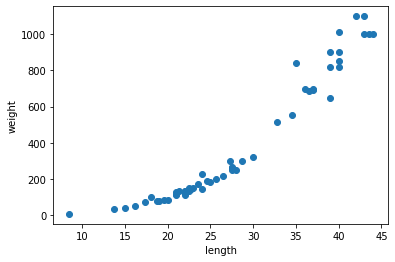

In [131]:
plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,random_state=100)

In [133]:
print(X_train.shape,X_test.shape)

(42,) (14,)


In [134]:
test_array=np.array([1,2,3,4])
print(test_array.shape)
print(test_array)

(4,)
[1 2 3 4]


In [135]:
test_array=test_array.reshape(-1,1)
print(test_array.shape)
print(test_array)

(4, 1)
[[1]
 [2]
 [3]
 [4]]


In [136]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
print(X_train.shape,X_test.shape)

(42, 1) (14, 1)


# 2.학습

In [137]:
from sklearn.neighbors import KNeighborsRegressor

In [138]:
knr=KNeighborsRegressor(n_neighbors=3)

In [139]:
# k-최근접 이웃 회귀모델을 학습합니다.
knr.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
X_test.shape

(335, 5)

In [6]:
Y_test.shape

(335,)

In [142]:
print(knr.predict([[50]]))

[1033.33333333]


In [143]:
import matplotlib.pyplot as plt

[[6. 7. 7.]] [[34  8 14]]


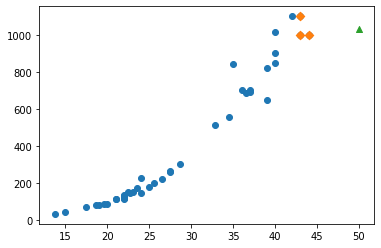

In [144]:
#50cm농어의 이웃을 구하기
distances,indexes=knr.kneighbors([[50]])
print(distances,indexes)
#훈련세트의 산점도를 그리기
plt.scatter(X_train,Y_train)
#훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(X_train[indexes],Y_train[indexes],marker="D")
plt.scatter(50,1033,marker="^")
plt.show()

In [145]:
print(np.mean(X_train[indexes]))

43.333333333333336


In [146]:
print(knr.predict([[100]]))

[1033.33333333]


In [147]:
print(knr.predict([[200]]))

[1033.33333333]


[[56. 57. 57.]] [[34  8 14]]


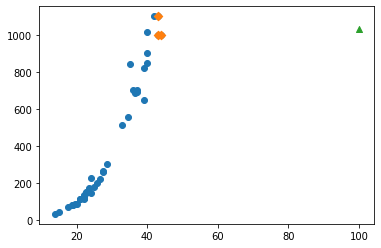

In [148]:
#100cm농어의 이웃을 구하기
distances,indexes=knr.kneighbors([[100]])
print(distances,indexes)
#훈련세트의 산점도를 그리기
plt.scatter(X_train,Y_train)
#훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(X_train[indexes],Y_train[indexes],marker="D")
plt.scatter(100,1033,marker="^")
plt.show()

In [149]:
plt.scatter
#K최근접은 어떤값안에서만 예측되고 범어사나면 예측이 불가능 

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

# 3. 선형회귀

In [14]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
df=pd.read_csv("insurance.csv")
X_data=df.drop("sex",axis=1)
Y_data=df["sex"]

In [10]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()
#선형회귀 모델 훈련
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

In [153]:
print(lr.predict([[50]]))


[1241.83860323]


In [154]:
print(lr.predict([[75]]))

[2217.26722732]


In [155]:
print(lr.predict([[100]]))

[3192.69585141]


In [156]:
print("기울기",lr.coef_)
print("절편",lr.intercept_)

기울기 [39.01714496]
절편 -709.0186449535477


ValueError: x and y must be the same size

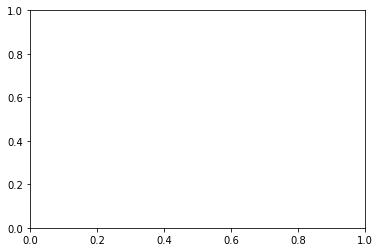

In [18]:
import matplotlib.pyplot as plt
#훈련세트의 산점도를 그립니다
plt.scatter(X_train,Y_train)
#15에서 50까지 1차 방정식 그래프를 그려보기
#50cm 농어 데이터
plt.scatter(50,1241.8,marker="^")
plt.show()

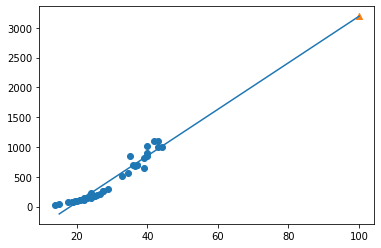

In [158]:
#훈련세트의 산점도를 그립니다
plt.scatter(X_train,Y_train)
#15에서 100까지 1차 방정식 그래프를 그려보기
plt.plot([15,100],[15*lr.coef_+lr.intercept_,100*lr.coef_+lr.intercept_])
#100cm 농어 데이터
plt.scatter(100,3192.6,marker="^")
plt.show()

In [159]:
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.939846333997604
0.8247503123313558


# 4. 다항회귀

In [160]:
train_poly=np.column_stack((X_train**2,X_train))
test_poly=np.column_stack((X_test**2,X_test))

In [161]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [164]:
lr=LinearRegression()
lr.fit(train_poly,Y_train)
print(lr.predict([[50**2,50]]))


[1573.98423528]


In [165]:
print("기울기",lr.coef_)
print("절편",lr.intercept_)

기울기 [  1.01433211 -21.55792498]
절편 116.05021078278259


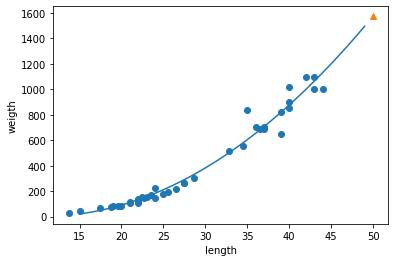

In [166]:
#구간별 직선을 그리기위해 15에서 49까지 정수 배열을 만들기
point=np.arange(15,50)
#훈련세트의 산점도를 그리기
plt.scatter(X_train,Y_train)
#15에서 50까지 2차 방정식 그리기
plt.plot(point,point**2*lr.coef_[0]+point*lr.coef_[1]+lr.intercept_)
plt.scatter([50],[1574],marker="^")
plt.xlabel("length")
plt.ylabel("weigth")
plt.show()

In [167]:
print(lr.score(train_poly,Y_train))
print(lr.score(test_poly,Y_test))

0.9706807451768623
0.9775935108325121
